##### This project aims to automate to loan approval processes of Financial Institutions they by reducing turn around time for loan requests, removing biases etc.

##### We will follow the following steps to achieve this;
    -- Loading and exploring the data
    -- Dropping unecessary columns
    -- Working with missing values
    -- Visualization
    -- Encoding the categorical data
    -- Model Development
        -- Splitting the data into test/train
        -- Using GaussianNB
        -- Loss function
        -- Using SVC with Grid Search CV
        -- XGBoost classifier
        -- Decision Tree using randomized search
        -- Random forest using randomized search
    -- Selecting and saving the model
    -- Deployment

Start by importing dependencies

In [445]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load our dataset from our local machine

In [446]:
import pandas as pd
df = pd.read_csv(r'C:\Users\affuy\Documents\LHL\Data_Sets\train_u6lujuX_CVtuZ9i (1).csv')

View first few rows to understand the dataset 

In [447]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [448]:
df.shape

(614, 13)

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [450]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Let's check for null values in the dataset

In [451]:
def missing_values(dataset):
    a = num_null_values = dataset.isnull().sum()
    return a

In [452]:
missing_values(df)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### Our dataset has null values so we have to handle them. We will start with handling categorical values.

We will start by dropping the loan ID and dependents columns because we do not require them for the model as they have no influence over if a loan is approved or not.

In [453]:
df.drop(['Loan_ID', 'Dependents'], axis=1, inplace=True)

In [454]:
# View data after dropping unwanted columns
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [455]:
# Let's view categorical columns with null values
cols = df[['Gender', 'Married', 'Self_Employed']]
for i in cols:
    df[i].fillna(df[i].mode().iloc[0], inplace=True)

We have replaced the null values of the categorical columns with the mode of the respective columns. Let's view our dataset again

In [456]:
df.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### Next we with deal with missing data of the numerical data

In [457]:
n_cols = df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
for i in n_cols:
    df[i].fillna(df[i].mean(), inplace=True)

In [458]:
df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### VISUALIZATION

This task is a classification problem because it involves predicting a discrete output variable, specifically the 'Loan_Status,' which appears to be a binary variable with values 0 and 1. In classification problems, the goal is to assign input data points to predefined categories or classes. 

In this scenario, the objective is to categorize loan applications into either approved (1) or declined (0) based on various input features such as 'Gender,' 'Married,' 'Education,' and others. The nature of the 'Loan_Status' variable, representing distinct classes indicating loan approval outcomes, aligns with the characteristics of a classification problem, where the aim is to build a model that can learn and generalize patterns from historical data to make predictions on new, unseen instances.

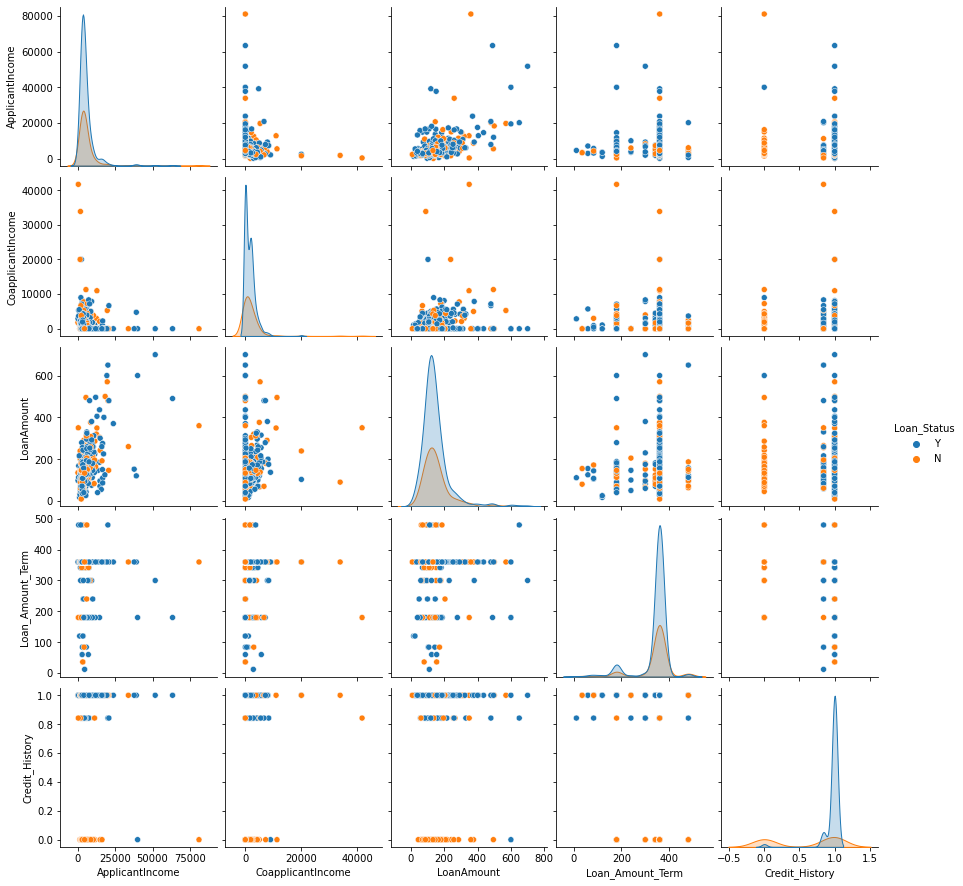

In [459]:
# Visualize relationships between predictor variables and the outcome variable
sns.pairplot(df, hue='Loan_Status', diag_kind='kde')
plt.show()

The above pairplot does not really show the relationships between feature pairs so we will use the correlation matrix to get a clearer idea. 

Exploring feature relationships in your loan approval project is not only beneficial for data analysis and interpretability but also plays a crucial role in guiding the choice of the machine learning algorithm. 

Understanding the relationships between features helps in assessing whether the assumptions of certain algorithms, such as independence between features, hold true for your dataset. For instance, if features are highly correlated, linear models like logistic regression may be influenced, and alternative models such as decision trees or ensemble methods might be considered. 

Moreover, identifying which features are more influential in predicting 'Loan_Status' can guide the selection of algorithms that handle feature importance differently. This thorough exploration of feature relationships contributes not only to the reliability of your predictive model but also to the strategic choice of a machine learning algorithm that aligns with the characteristics of your dataset and the goals of the loan approval project.

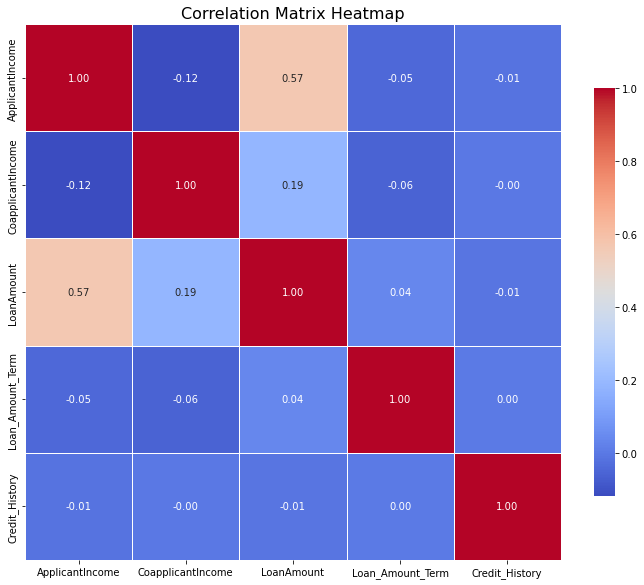

In [460]:
# Display the correlation matrix
# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create a correlation matrix
correlation_matrix = df.corr()

# Customize the heatmap for better aesthetics
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True, cbar_kws={"shrink": 0.75})

# Set the title
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Show the plot
plt.show()

We will use a bar chart to visualize the number of approved and Declined loans

In [461]:
def bar_chart(col):
    """
    Generate a bar chart to visualize the distribution of a categorical variable
    based on loan approval status.

    Parameters:
    - col: str
        The name of the categorical column for which the bar chart is generated.

    Usage:
    bar_chart('ColumnName')

    Example:
    bar_chart('Property_Area')
    """
    # Filter data for approved and declined loan status
    Approved = df[df['Loan_Status'] == 'Y'][col].value_counts()
    Declined = df[df['Loan_Status'] == 'N'][col].value_counts()
    
    # Create a DataFrame for visualization
    df1 = pd.DataFrame([Approved, Declined])
    df1.index = ['Approved', 'Declined']
    
    # Plot a bar chart with title
    ax = df1.plot(kind='bar', rot=0)
    ax.set_title(f'Loan Approval Distribution by {col}')

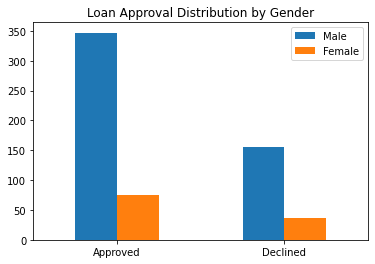

In [462]:
bar_chart('Gender')

We notice that males have a higher number of approved loans and also larger number of declined loans. So lets view the percentage of male and female in the dataset.

In [463]:
def calculate_percentage(df, col):
    """
    Calculate and display the percentage of each category in a given column.

    Parameters:
    - df: pandas.DataFrame
        The DataFrame containing the data.
    - col: str
        The name of the column for which to calculate percentages.

    Returns:
    None
    """

    # Calculate the total count for each category
    category_counts = df[col].value_counts()

    # Calculate the total number of entries (excluding missing values)
    total_entries = category_counts.sum()

    # Calculate and display the percentage for each category
    for category in category_counts.index:
        percentage = (category_counts[category] / total_entries) * 100
        print(f"Percentage of {category}: {percentage:.2f}%")

# Example usage
calculate_percentage(df, 'Gender')


Percentage of Male: 81.76%
Percentage of Female: 18.24%


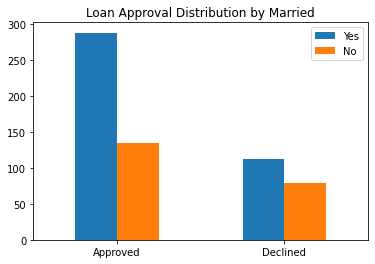

In [464]:
bar_chart('Married')

#### We also see that 'Married'people have a higher loan approval than unmarried ones. Again we view the representation of both married and unmarried

In [465]:
calculate_percentage(df, 'Married')


Percentage of Yes: 65.31%
Percentage of No: 34.69%


So there is also a larger number of married people represented in the dataset. Let's look a 'Education' next.

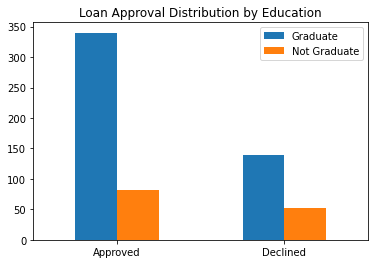

In [466]:
bar_chart('Education')

More loans are approved for Graduates over people that did not graduate and the same applies to loans declined. Again lets see how they're represented in our dataset.

In [467]:
calculate_percentage(df, 'Education')

Percentage of Graduate: 78.18%
Percentage of Not Graduate: 21.82%


And again, we have more graduates represented in our dataset.Lastly we check for 'Self_Employed' people.

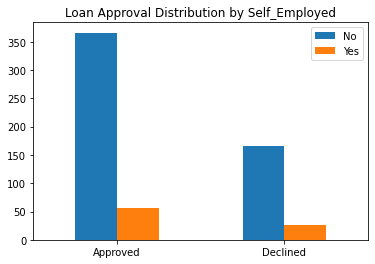

In [468]:
bar_chart('Self_Employed')

We can ee that more loans are approved and declined for people that are not Self_Employed. This could also be that 'Self_Employed people are not well represented in the dataset. Let's see;

In [469]:
calculate_percentage(df, 'Self_Employed')

Percentage of No: 86.64%
Percentage of Yes: 13.36%


This confirms only 13% of self employed people are represented on our dataset. We might have to use some methods to address these imbalances in our categorical features so our model can perform better in generalizing new unseen data.

### Preprocessing

Let us create some additional columns from our existing features that will help our model's generalization to new unseen data

In [470]:
# Total Income Feature
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Description: The 'Total_Income' feature combines the individual incomes of the applicant and co-applicant, providing a holistic view of the household's financial capacity.

In [471]:
# Loan Amount to Total Income Ratio Feature
df['LoanAmount_to_TotalIncome_Ratio'] = df['LoanAmount'] / df['Total_Income']

# Description: The 'LoanAmount_to_TotalIncome_Ratio' feature represents the ratio of the loan amount to the total income, offering insights into the borrower's ability to manage repayments relative to their overall income.


In [472]:
# Loan Term Multiplier Feature
df['LoanTerm_Multiplier'] = df['Loan_Amount_Term'] * df['LoanAmount']

# Description: The 'LoanTerm_Multiplier' feature multiplies the loan amount by the loan term, providing a measure of the total amount repayable over the loan term, capturing the overall financial commitment.


In [473]:
# Display the updated DataFrame with new features
print(df.head())

  Gender Married     Education Self_Employed  ApplicantIncome  \
0   Male      No      Graduate            No             5849   
1   Male     Yes      Graduate            No             4583   
2   Male     Yes      Graduate           Yes             3000   
3   Male     Yes  Not Graduate            No             2583   
4   Male      No      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

  Property_Area Loan_Status  Total_Income  LoanAmount_to_TotalIncome_Ratio  \
0         Urban           Y        5849.0                         0.025032   
1         Rural           N     

##### Now let us encode our categorical columns using ordinal encoding


In [474]:
from sklearn.preprocessing import OrdinalEncoder
# Initialize the OrdinalEncoder
ord_enc = OrdinalEncoder()

# Specify the categorical columns to be encoded
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Fit and transform the specified columns using OrdinalEncoder
df[categorical_columns] = ord_enc.fit_transform(df[categorical_columns])


In [475]:
print(df.isnull().sum())

Gender                             0
Married                            0
Education                          0
Self_Employed                      0
ApplicantIncome                    0
CoapplicantIncome                  0
LoanAmount                         0
Loan_Amount_Term                   0
Credit_History                     0
Property_Area                      0
Loan_Status                        0
Total_Income                       0
LoanAmount_to_TotalIncome_Ratio    0
LoanTerm_Multiplier                0
dtype: int64


##### Let's begin by checking if there are outlier in our dataset

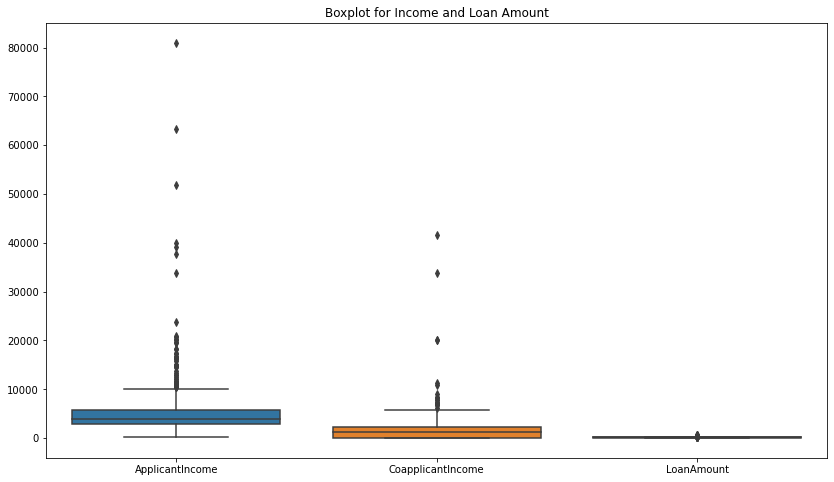

In [476]:
# Checking for outliers using box plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
plt.title('Boxplot for Income and Loan Amount')
plt.show()

These features posses a lot of outliers and we must address them by capping them within range to the 95th percentile

In [477]:
# Addressing outliers by capping values at the 95th percentile
columns_to_cap = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for col in columns_to_cap:
    percentile_95 = df[col].quantile(0.95)
    df[col] = np.where(df[col] > percentile_95, percentile_95, df[col])

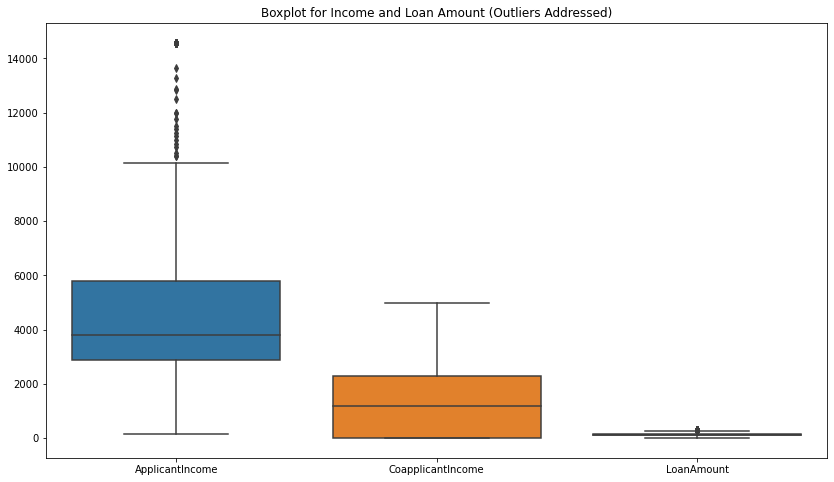

In [478]:
# Display updated box plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
plt.title('Boxplot for Income and Loan Amount (Outliers Addressed)')
plt.show()

Now the outliers have been handled. Lets see how are dataset is distributed to further help us determine the best model algorithm to use

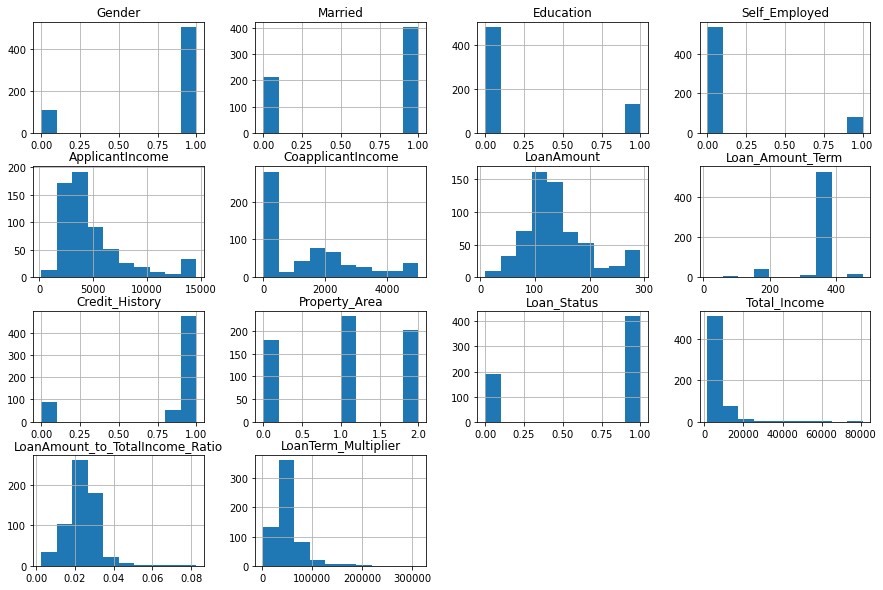

In [479]:
df.hist(figsize=(15, 10))
plt.show()

We can see that our features are not normally distributed and there's no linearity between them hence a linear regression model will not be suitable for this task.

In [480]:
# Convert the specified columns to integers
df[categorical_columns] = df[categorical_columns].astype(int)

# Display the DataFrame with integer values
print(df.head())

   Gender  Married  Education  Self_Employed  ApplicantIncome  \
0       1        0          0              0           5849.0   
1       1        1          0              0           4583.0   
2       1        1          0              1           3000.0   
3       1        1          1              0           2583.0   
4       1        0          0              0           6000.0   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  Loan_Status  Total_Income  LoanAmount_to_TotalIncome_Ratio  \
0              2            1        5849.0                         0.025032   
1              0            

##### Given the outcome of the correlation matrix, which indicates limited correlation between features, particularly with only 'LoanAmount' and 'ApplicantIncome' showing a fair degree of correlation, linear models might not be the most suitable choice. Linear models, such as Gaussian Naive Bayes (GaussianNB) and Support Vector Classifier (SVC), assume linear relationships between features and the target variable. However, the lack of strong correlations suggests that the relationships may be more complex.

##### To account for potential non-linear patterns and interactions in the data, more sophisticated models like XGBoost classifier, Decision Trees, and Random Forests were chosen. These models are capable of capturing intricate relationships and can be effective in scenarios where linear models may fall short. The inclusion of hyperparameter tuning through techniques like Grid Search Cross-Validation and Randomized Search further allows for the optimization of model parameters, ensuring that the selected algorithms are tailored to the specific characteristics of the dataset. In summary, the choice of modeling techniques is informed by the observed feature relationships in the correlation matrix, aiming to address the complexity of the data and enhance the model's predictive capabilities.

Being that I am going to be using algorithims that handle scaling(XGBoost classifier, Decision trees and Random Forest with inclusion of hyper parameter tuning with Grid Search Cross-Validation and Random Search), I do not necessary need to normilize my dataset. But just to ensure we are using the best model for this tast, we will scale the dataset and see how the model performs with the scaled data and without it.

#### Scale the dataset
-- Lets import the necessary dependecies for this part of our task the split our data into train and test data and create 2 pipelines for scaled and unscaled data used in training the model

In [481]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier

In [482]:
# Extract features and target variable
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [483]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(491, 13)
(491,)
(123, 13)
(123,)


Let's see how model will perform with GaussianNB

In [484]:
from sklearn.naive_bayes import GaussianNB
gfc = GaussianNB()
gfc.fit(X_train, y_train)
pred1 = gfc.predict(X_test)

##### Now lets evaluate our model by creating a loss function that takes the true value and the predicted value

In [485]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

def loss(y_true, y_pred):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    print(pre)
    print(rec)
    print(acc)

In [486]:
loss(y_test, pred1)

0.6814159292035398
0.9166666666666666
0.6504065040650406


This is a fair prediction from the model but lets try using a more complex algorithm SVC.

In [487]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C':[0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END ..........C=1, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [488]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

Next lets use the best parameters from our GridSearchCV

In [489]:
svc = SVC(C= 0.1, gamma= 1, kernel= 'rbf')

In [490]:
# Now lets fit our model again and get the second predictions
svc.fit(X_train, y_train)
pred2 = svc.predict(X_test)
loss(y_test, pred2)

0.6829268292682927
1.0
0.6829268292682927


Now we will create a pipeline and use XGBoost Classifier on both the scaled and unscaled dataset to see if the performance is better

In [500]:
# Define parameters for XGBoost
xgb = XGBClassifier(learning_rate= 0.1,
                    n_estimators=1000,
                    max_depth=3,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)

In [501]:
# Create a pipeline for unscaled data
pipeline_unscaled = Pipeline([
    ('model', XGBClassifier())
])

In [508]:
# Fit and evaluate the unscaled pipeline
pipeline_unscaled.fit(X_train, y_train)
y_pred_unscaled = pipeline_unscaled.predict(X_test)

# Calculate and print your custom loss
loss(y_test, y_pred_unscaled)

0.7802197802197802
0.8452380952380952
0.7317073170731707


##### Now lets used the scaled data

In [503]:
# Create a pipeline for scaled data
pipeline_scaled = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', XGBClassifier())
])

In [509]:
# Fit and evaluate the scaled pipeline
pipeline_scaled.fit(X_train, y_train)
y_pred_scaled = pipeline_scaled.predict(X_test)

# Calculate and print your custom loss
loss(y_test, y_pred_scaled)

0.7802197802197802
0.8452380952380952
0.7317073170731707


##### The accuracy for both scaled and unscaled are identical which tells us that my model is not sensitive to scaling so I will go ahead without scaling.

Next we will use the Decision tree algorithm with Randomized Search


In [510]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the Decision Tree model
dt_model = DecisionTreeClassifier()

# Define the hyperparameter grid for Randomized Search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create a Randomized Search CV object
dt_random_search = RandomizedSearchCV(dt_model, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1)

# Fit the model
dt_random_search.fit(X_train, y_train)

# Get the best model from the Randomized Search
best_dt_model = dt_random_search.best_estimator_

# Predictions
y_pred_dt = best_dt_model.predict(X_test)

# Calculate and print your custom loss
loss(y_test, y_pred_dt)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0.7623762376237624
0.9166666666666666
0.7479674796747967


Finally we will use random forest

In [511]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameter grid for Randomized Search
param_dist = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Randomized Search CV object
rf_random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1)

# Fit the model
rf_random_search.fit(X_train, y_train)

# Get the best model from the Randomized Search
best_rf_model = rf_random_search.best_estimator_

# Predictions
y_pred_rf = best_rf_model.predict(X_test)

# Calculate and print your custom loss
loss(y_test, y_pred_rf)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0.7777777777777778
0.9166666666666666
0.7642276422764228


### Let's analyze the results and discuss the performance of each model based on the three metrics: precision, recall, and accuracy.

### Random Forest with Randomized Search:
- Precision: 0.778
- Recall: 0.917
- Accuracy: 0.764

### Decision Tree with Randomized Search:
- Precision: 0.762
- Recall: 0.917
- Accuracy: 0.748

### XGBoost Classifier:
- Precision: 0.780
- Recall: 0.845
- Accuracy: 0.732

### SVC with GridSearchCV:
- Precision: 0.683
- Recall: 1.000
- Accuracy: 0.683

### GaussianNB:
- Precision: 0.681
- Recall: 0.917
- Accuracy: 0.650

### Analysis:
- Random Forest with Randomized Search and Decision Tree with Randomized Search show similar performance, with Random Forest having a slightly higher precision.
- XGBoost Classifier has a good balance between precision and recall, with decent accuracy.
- SVC with GridSearchCV has the highest recall but lower precision, resulting in lower overall accuracy.
- GaussianNB has the lowest precision and accuracy among all models.

### Recommendation:
Considering the trade-off between precision and recall, the **Random Forest with Randomized Search** appears to be a strong candidate. It achieves a good balance between precision and recall, making it suitable for a loan prediction scenario where both false positives and false negatives should be minimized.

#### Additionally, let's further fine-tune the hyperparameters of the Random Forest model or explore ensemble methods to potentially improve its performance.

In [512]:
# Get in our dependecies
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [513]:
# Random Forest Hyperparameter Tuning
rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

In [514]:
# Evaluate on Test Set
y_pred_rf_tuned = best_rf_model.predict(X_test)
print("Random Forest (Tuned) - Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("Random Forest (Tuned) - Precision:", precision_score(y_test, y_pred_rf_tuned))
print("Random Forest (Tuned) - Recall:", recall_score(y_test, y_pred_rf_tuned))

Random Forest (Tuned) - Accuracy: 0.7723577235772358
Random Forest (Tuned) - Precision: 0.78
Random Forest (Tuned) - Recall: 0.9285714285714286


In [515]:
# Stacking with Random Forest, SVC, Naive Bayes, and Decision Tree
estimators = [
    ('rf', best_rf_model),
    ('svc', SVC(probability=True)),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier())
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())

In [516]:
# Evaluate Stacking Model on Test Set
y_pred_stacking = cross_val_predict(stacking_model, X_test, y_test, cv=5)
print("Stacking Model - Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Stacking Model - Precision:", precision_score(y_test, y_pred_stacking))
print("Stacking Model - Recall:", recall_score(y_test, y_pred_stacking))

Stacking Model - Accuracy: 0.6585365853658537
Stacking Model - Precision: 0.75
Stacking Model - Recall: 0.75


#### Let's now conduct a comprehensive comparison of all prediction results by visualizing the evaluations, aiding in the selection of the optimal model.

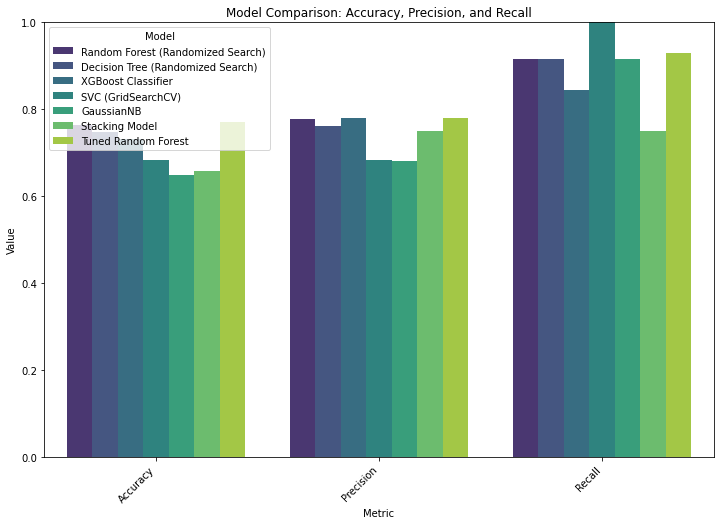

In [517]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Results
results = {
    'Model': ['Random Forest (Randomized Search)', 'Decision Tree (Randomized Search)', 'XGBoost Classifier', 'SVC (GridSearchCV)', 'GaussianNB', 'Stacking Model', 'Tuned Random Forest'],
    'Accuracy': [0.764, 0.748, 0.732, 0.683, 0.650, 0.659, 0.772],
    'Precision': [0.778, 0.762, 0.780, 0.683, 0.681, 0.750, 0.780],
    'Recall': [0.917, 0.917, 0.845, 1.000, 0.917, 0.750, 0.929]
}

# Create a DataFrame
results_df = pd.DataFrame(results)

# Melt the DataFrame for better visualization
melted_results = pd.melt(results_df, id_vars='Model', var_name='Metric', value_name='Value')

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Value', hue='Model', data=melted_results, palette='viridis')
plt.title('Model Comparison: Accuracy, Precision, and Recall')
plt.ylim(0, 1)  # Set y-axis limit to better compare values
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


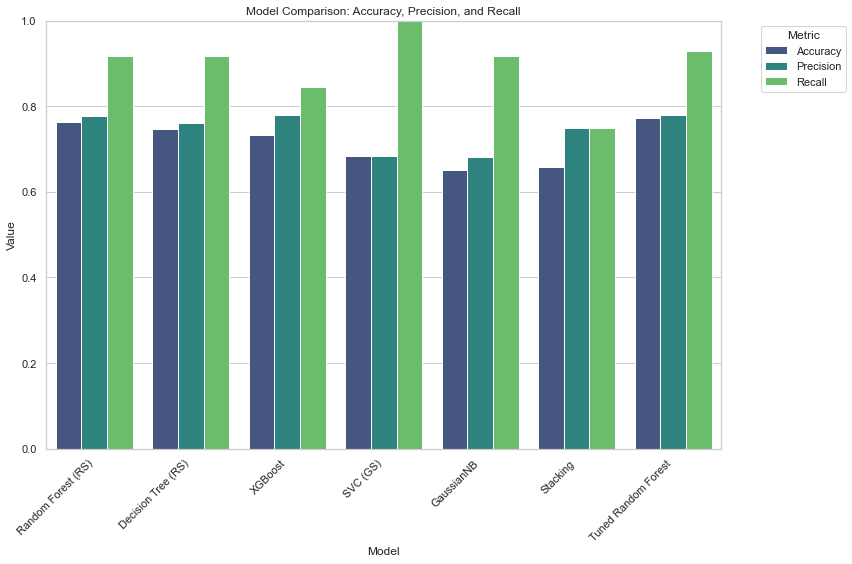

In [518]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Results
results = {
    'Model': ['Random Forest (RS)', 'Decision Tree (RS)', 'XGBoost', 'SVC (GS)', 'GaussianNB', 'Stacking', 'Tuned Random Forest'],
    'Accuracy': [0.764, 0.748, 0.732, 0.683, 0.650, 0.659, 0.772],
    'Precision': [0.778, 0.762, 0.780, 0.683, 0.681, 0.750, 0.780],
    'Recall': [0.917, 0.917, 0.845, 1.000, 0.917, 0.750, 0.929]
}

# Create a DataFrame
results_df = pd.DataFrame(results)

# Melt the DataFrame for better visualization
melted_results = pd.melt(results_df, id_vars='Model', var_name='Metric', value_name='Value')

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Model', y='Value', hue='Metric', data=melted_results, palette='viridis')

# Beautify the plot
plt.title('Model Comparison: Accuracy, Precision, and Recall')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### In the context of predicting loan approvals, precision and recall play pivotal roles, representing the model's ability to accurately identify approved loans and avoid missing potential approvals, respectively. A delicate balance between these two metrics is crucial for lending institutions. Comparing the results, the Tuned Random Forest exhibits superior performance with a precision of 0.780 and a recall of 0.929. This signifies that the model achieves a high accuracy in predicting approved loans while also effectively capturing the majority of relevant cases. 

#### Given the importance of both minimizing false positives and false negatives in loan approval decisions, the Tuned Random Forest emerges as the recommended algorithm, offering a well-rounded and effective solution for the specific challenges posed by loan prediction scenarios.

#### Now let us save our model and try to deploy it on our local machine to demonstrate the performance from a user interface

In [522]:
from joblib import dump

# Save the Tuned Random Forest model
dump(best_rf_model, 'loan_approval_model.joblib')

['loan_approval_model.joblib']

#### Create a new Python file app.py and set up a basic Flask application.

In [523]:
pip install Flask


Note: you may need to restart the kernel to use updated packages.
